## OBJECTIF DU NOTEBOOK ##

Ce notebook a pour objectif de mettre en évidence des inégalités en France en s'appuyant sur les données INSEE de : 

- localisation des entreprises
- type d'activité des entreprises
- tailles des entreprises
- population active
- salaires

Le lien entre ces 4 tables est le code géographique communale de l'INSEE. Code à partir duquel on peut déterminer la localisation gps ainsi que toutes les appartenances à des zones administratives (régions, départements, etc.)

Datant de 2014, le jeu a été réactualisé par nos soins avec des données publiées en 2020, dernière année pour laquelle nous pouvions regrouper l'ensemble des variables à l'indentique.

Le jeu de données contient près de 35.000 communes.  
En revanche, les données de salaires ne concernent qu'environ 5000 communes.  
Pourquoi ? Car les données salariales sont soumises à un secret statistique de l'INSEE : 

**"Aucune statistique n'est diffusée pour les zones de moins de 2 000 habitants. Pour quelques zones de 2 000 habitants ou plus, qui ne respectent pas les seuils, il n'est pas non plus possible de diffuser des résultats. À savoir, chaque case du tableau doit comporter au moins 5 salariés et aucun salarié ne doit représenter plus de 80% de la masse salariale de la case."**

Par conséquent, notre étude salariale sera limitée à ces conditions.

## IMPORT DES LIBRAIRIES ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT DU DATASET 2020 ##

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../all_content_2020_v4.csv')

C:\Users\vivie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,4,8,519,520,521) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## CHOIX DES VARIABLES ##

- Variables géographiques:
    - CODGEO
    - EU_circo
    - num_dep
    - nom_commune
    - nom_dep
    - nom_region
    - latitude
    - longitude
- Variable population active:
    - P19_ACT1564 Actifs 15-64 ans en 2019 (princ)
- Variables entreprises:
    - ETTOT20 Total Ets actifs fin 2020	
    - ETAZ20 Ets actifs agriculture fin 2020	
    - ETBE20 Ets actifs industrie fin 2020	
    - ETFZ20 Ets actifs construction fin 2020	
    - ETGU20 Ets actifs commerce et services marchands fin 2020	
    - ETOQ20 Ets actifs services non marchands fin 2020	
    - ETTEF020 Ets actifs sans salarié fin 2020	
    - ETTEF120 Ets actifs de 1 à 9 salariés fin 2020	
    - ETTEF1020 Ets actifs de 10 à 19 salariés fin 2020	
    - ETTEF2020 Ets actifs de 20 à 49 salariés fin 2020	
    - ETTEF5020 Ets actifs de 50 salariés ou plus fin 2020	
    - ETPTOT20 Postes des Ets actifs fin 2020	
    - ETPTEF120 Postes des Ets actifs de 1 à 9 salariés fin 2020	
    - ETPTEF1020 Postes des Ets actifs de 10 à 19 salariés fin 2020	
    - ETPTEF2020 Postes des Ets actifs de 20 à 49 salariés fin 2020	
    - ETPTEF5020 Postes des Ets actifs de 50 à 99 salariés fin 2020	
    - ETPTEFCP20 Postes des Ets actifs de 100 salariés ou plus fin 2020	
- Variables salaires
    - SNHM20 Salaire net horaire moyen en 2020

In [4]:
#Constitution du nouveau dataset suite au choix des variables

df_analyse = df[['CODGEO', 
               'EU_circo', 
               'num_dep', 
               'nom_commune', 
               'nom_dep', 
               'nom_region', 
               'latitude', 
               'longitude',
               'P19_ACT1564',
               'ETTOT20', 
               'ETAZ20', 
               'ETBE20', 
               'ETFZ20', 
               'ETGU20', 
               'ETOQ20', 
               'ETTEF020', 
               'ETTEF120', 
               'ETTEF1020', 
               'ETTEF2020',
               'ETTEF5020',
               'ETPTOT20',
               'ETPTEF120',
               'ETPTEF1020',
               'ETPTEF2020',
               'ETPTEF5020',
               'ETPTEFCP20',
               'SNHM20']]

In [5]:
#Vérification des NaN

#On constate qu'il y a 17 NaN sur les variables ETTOT20 et P19_ACT1564 
#et un nombre important de NaN sur la variable de salaires, comme mentionné en introduction

df_analyse.isna().sum().to_frame()

,0
CODGEO,0
EU_circo,0
num_dep,0
nom_commune,0
nom_dep,0
nom_region,0
latitude,8
longitude,8
P19_ACT1564,17
ETTOT20,17


In [6]:
# Supression des lignes ayant des NaN sur les variables ETTOT20 et P19_ACT1564
# supression des lignes sans données de salaires

df_analyse = df_analyse.dropna(subset=['ETTOT20'], axis=0)
df_analyse = df_analyse.dropna(subset=['P19_ACT1564'], axis=0)
df_analyse = df_analyse.dropna(subset=['SNHM20'], axis=0)
df_analyse.isna().sum().to_frame()

,0
CODGEO,0
EU_circo,0
num_dep,0
nom_commune,0
nom_dep,0
nom_region,0
latitude,0
longitude,0
P19_ACT1564,0
ETTOT20,0


Le dataset est désormais prêt pour une analyse

# ANALYSE #

### Total de communes de l'analyse ###

In [7]:
print('Total nombre de communes de l\'analyse :', str(len(df_analyse)))

Total nombre de communes de l'analyse : 5376


Pour rappel, ces communes ont une population > 2000 habitants et comportent au minimum 5 salariés

### Total de la population active de l'analyse ###

In [8]:
df_analyse.P19_ACT1564 = df_analyse.P19_ACT1564.astype('int64')

In [9]:
print('Total de la population active de l\'analyse :', f"{df_analyse.P19_ACT1564.sum():,}" )

Total de la population active de l'analyse : 23,851,309


### Total des entreprises actives de l'analyse ###

In [10]:
df_analyse.ETTOT20 = df_analyse.ETTOT20.astype('int64')
print('Total d\'entreprises actives de l\'analyse :', f"{df_analyse.ETTOT20.sum():,}" )

Total d'entreprises actives de l'analyse : 1,851,173


### Total des entreprises de l'analyse par activité ###

In [11]:
df_analyse.ETAZ20 = df_analyse.ETAZ20.astype('int64')
df_analyse.ETBE20 = df_analyse.ETBE20.astype('int64')
df_analyse.ETFZ20 = df_analyse.ETFZ20.astype('int64')
df_analyse.ETGU20 = df_analyse.ETGU20.astype('int64')
df_analyse.ETOQ20 = df_analyse.ETOQ20.astype('int64')


activite = pd.DataFrame({'Agriculture': [f"{df_analyse.ETAZ20.sum():,}"],
                        'Industrie': [f"{df_analyse.ETBE20.sum():,}"],
                        'Construction': [f"{df_analyse.ETFZ20.sum():,}"],
                        'Com. & Ser. marchands': [f"{df_analyse.ETGU20.sum():,}"],
                        'Ser. non marchands': [f"{df_analyse.ETOQ20.sum():,}"],
                        })

activite = pd.DataFrame([df_analyse.ETAZ20.sum(), 
                          df_analyse.ETBE20.sum(), 
                          df_analyse.ETFZ20.sum(),
                          df_analyse.ETGU20.sum(),
                          df_analyse.ETOQ20.sum()], 
                        index=['Agriculture', 'Industrie', 'Construction', 'Com. & Ser. marchands', 'Ser. non marchands'],
                        columns=['Total ets'])
total = df_analyse.ETAZ20.sum() + df_analyse.ETBE20.sum() + df_analyse.ETFZ20.sum() + df_analyse.ETGU20.sum() + df_analyse.ETOQ20.sum()
print(total)

activite['%'] = np.round(activite['Total ets'] / total * 100, 1)
activite

1851173


,Total ets,%
Agriculture,35527,1.9
Industrie,114214,6.2
Construction,186992,10.1
Com. & Ser. marchands,1293385,69.9
Ser. non marchands,221055,11.9


## Nombre d'établissements et populations par grandes régions ##

In [12]:
grand_reg_total_ets = df_analyse.groupby('EU_circo', as_index=False).agg(Total_ets = ('ETTOT20', 'sum'), Total_popA = ('P19_ACT1564', 'sum')).sort_values(by='Total_ets', ascending=False).reset_index(drop=True)
grand_reg_total_ets['% ets'] = grand_reg_total_ets['Total_ets'] / grand_reg_total_ets['Total_ets'].sum()
grand_reg_total_ets['% popA'] = grand_reg_total_ets['Total_popA'] / grand_reg_total_ets['Total_popA'].sum()

#Catégorisation Paris + grand Sud pour analyse visuelle
grand_reg_total_ets['is_Paris_grand_Sud'] = grand_reg_total_ets.EU_circo.apply(lambda x: 1 if x in ['Île-de-France', 'Sud-Est', 'Sud-Ouest'] else 0)

grand_reg_total_ets

,EU_circo,Total_ets,Total_popA,% ets,% popA,is_Paris_grand_Sud
0,Île-de-France,450845,5891234,0.243546,0.246998,1
1,Sud-Est,421325,4967485,0.227599,0.208269,1
2,Sud-Ouest,315513,3694928,0.170439,0.154915,1
3,Ouest,193229,2616354,0.104382,0.109694,0
4,Nord-Ouest,189175,2840591,0.102192,0.119096,0
5,Est,171560,2284067,0.092676,0.095763,0
6,Centre,54775,742557,0.029589,0.031133,0
7,Outre-Mer,54751,814093,0.029576,0.034132,0


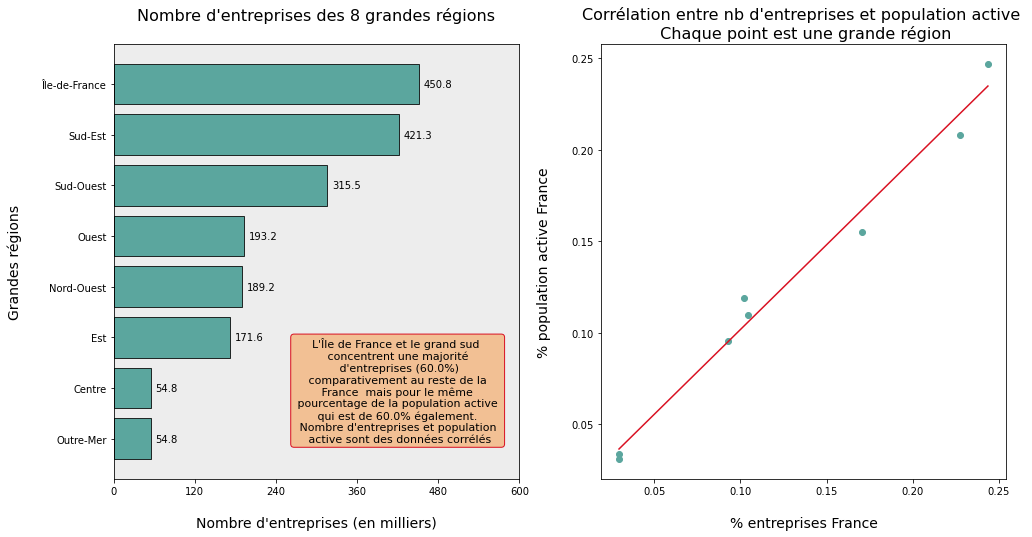

In [13]:
#Instanciation de la figure et de l'axe
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(121)

#Création de l'histogramme principal
barh = ax.barh(width =grand_reg_total_ets.Total_ets, y=grand_reg_total_ets.EU_circo, edgecolor='black', linewidth=0.8, color='#5BA69E')

#Configuration des axes et du titre
ax.set_ylabel('Grandes régions', labelpad=20, fontsize=14)
ax.set_xlabel('Nombre d\'entreprises (en milliers)', labelpad=20, fontsize=14)
ax.set_title('Nombre d\'entreprises des ' + str(len(grand_reg_total_ets)) +' grandes régions' +'\n', fontsize=16)

#labels
labels = ["{:,.1f}".format(int(i) / 1000) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)

#Configuration de l'apparence générale du graphique
ax.invert_yaxis()
ax.grid(visible=False)
ax.set_facecolor('#ededed')

#Configuration des abscisses
x= np.linspace(0,600000,6)
ax.set_xticks(x)
labels = [int(i / 1000) for i in x]
ax.set_xticklabels(labels = labels)

pourcentage_paris_sud_ets = np.round(grand_reg_total_ets[grand_reg_total_ets['is_Paris_grand_Sud'] == 1]['% ets'].sum(),1) * 100
pourcentage_paris_sud_pop = np.round(grand_reg_total_ets[grand_reg_total_ets['is_Paris_grand_Sud'] == 1]['% popA'].sum(),1) * 100

t = ax.text(s='L\'Île de France et le grand sud \n concentrent une majorité \n d\'entreprises (' + str(pourcentage_paris_sud_ets) +'%)\n comparativement au reste de la \n France  mais pour le même \n pourcentage de la population active \n qui est de ' + str(pourcentage_paris_sud_pop) +'% également. \n Nombre d\'entreprises et population \n active sont des données corrélés', x=420000, y=5, ha="left", va="top", size=12, bbox=dict(boxstyle="round,pad=0.3",fc="#f2c094", ec="#D91122", lw=1))
plt.setp(t, fontsize=11, horizontalalignment='center')

ax2 = plt.subplot(122)
ax2.set_title('Corrélation entre nb d\'entreprises et population active \n Chaque point est une grande région', fontsize=16)
ax2.scatter(x=grand_reg_total_ets['% ets'], y=grand_reg_total_ets['% popA'],color='#5BA69E' )
ax2.set_ylabel('% population active France', labelpad=20, fontsize=14)
ax2.set_xlabel('% entreprises France', labelpad=20, fontsize=14)

from sklearn.linear_model import LinearRegression
prop_ets = np.array(grand_reg_total_ets['% ets'])
prop_ets = prop_ets.reshape(-1, 1)

lr = LinearRegression()

lr.fit(prop_ets, grand_reg_total_ets['% popA'] )

lr_predict = lr.predict(prop_ets)

plt.plot(prop_ets, lr_predict, color='#D91122')

plt.show()

On observe donc que la répartition de la population active est homogène par rapport à la répartition des entreprises même si les régions présentent de fortes disparités entre-elles.

## Nombre d'établissements par région ##

In [14]:
reg_total_ets = df_analyse.groupby('nom_region', as_index=False).agg(Total_ets = ('ETTOT20', 'sum'), Total_popA = ('P19_ACT1564', 'sum')).sort_values(by='Total_ets', ascending=False).reset_index(drop=True)
reg_total_ets['% ets'] = reg_total_ets['Total_ets'] / reg_total_ets['Total_ets'].sum()
reg_total_ets['% popA'] = reg_total_ets['Total_popA'] / reg_total_ets['Total_popA'].sum()

reg_total_ets

,nom_region,Total_ets,Total_popA,% ets,% popA
0,Île-de-France,450845,5891234,0.243546,0.246998
1,Auvergne-Rhône-Alpes,223377,2788010,0.120668,0.116891
2,Provence-Alpes-Côte d'Azur,185184,2071641,0.100036,0.086856
3,Occitanie,162034,1915835,0.087530,0.080324
4,Nouvelle-Aquitaine,153479,1779093,0.082909,0.074591
5,Grand Est,118758,1655190,0.064153,0.069396
6,Hauts-de-France,118494,1927424,0.064010,0.080810
7,Pays de la Loire,103282,1446366,0.055793,0.060641
8,Bretagne,89947,1169988,0.048589,0.049053
9,Normandie,70681,913167,0.038182,0.038286


## Catégorisation des DOM TOM ##

In [15]:
reg_total_ets['is_DOMTOM'] = reg_total_ets['nom_region'].apply(lambda x: 1 if x in ['Guyane', 'Martinique', 'Guadeloupe', 'La Réunion'] else 0)
reg_total_ets

,nom_region,Total_ets,Total_popA,% ets,% popA,is_DOMTOM
0,Île-de-France,450845,5891234,0.243546,0.246998,0
1,Auvergne-Rhône-Alpes,223377,2788010,0.120668,0.116891,0
2,Provence-Alpes-Côte d'Azur,185184,2071641,0.100036,0.086856,0
3,Occitanie,162034,1915835,0.087530,0.080324,0
4,Nouvelle-Aquitaine,153479,1779093,0.082909,0.074591,0
5,Grand Est,118758,1655190,0.064153,0.069396,0
6,Hauts-de-France,118494,1927424,0.064010,0.080810,0
7,Pays de la Loire,103282,1446366,0.055793,0.060641,0
8,Bretagne,89947,1169988,0.048589,0.049053,0
9,Normandie,70681,913167,0.038182,0.038286,0


In [16]:
#Création de deux dataframes séparés entre métropole et dom tom
ets_region_metro = reg_total_ets[reg_total_ets['is_DOMTOM'] == 0].reset_index(drop=True)
ets_region_dom = reg_total_ets[reg_total_ets['is_DOMTOM'] == 1].reset_index(drop=True)

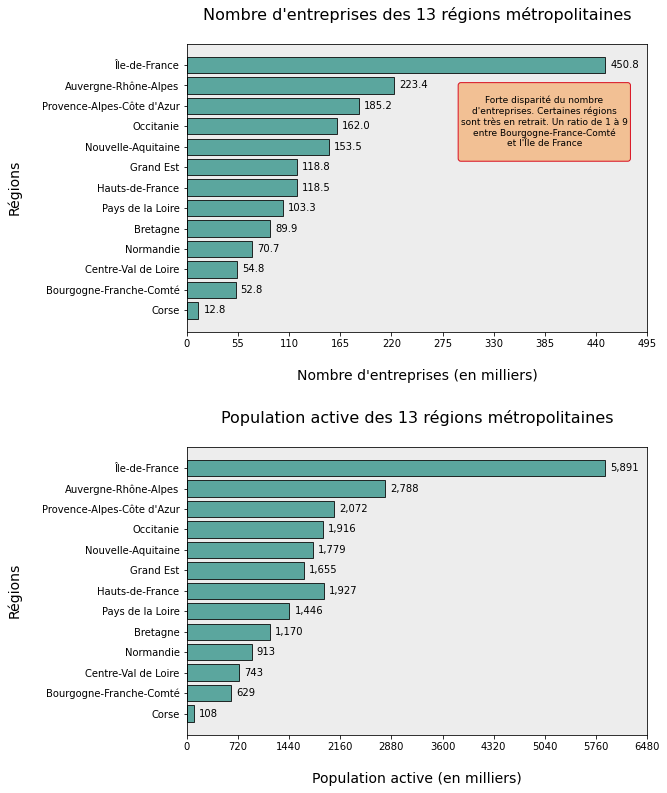

In [17]:
#Instanciation de la figure et de l'axe
fig = plt.figure(figsize=(8,12))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
ax = plt.subplot(211)

#Création de l'histogramme principal
barh = ax.barh(width =ets_region_metro.Total_ets, y=ets_region_metro.nom_region, edgecolor='black', linewidth=0.8, color='#5BA69E')

#Configuration des axes et du titre
ax.set_ylabel('Régions', labelpad=20, fontsize=14)
ax.set_xlabel('Nombre d\'entreprises (en milliers)', labelpad=20, fontsize=14)
ax.set_title('Nombre d\'entreprises des ' + str(len(ets_region_metro)) +' régions métropolitaines' +'\n', fontsize=16)

#labels
labels = ["{:,.1f}".format(int(i) / 1000) for i in barh.datavalues]
ax.bar_label(barh, labels=labels, padding=5)



t = ax.text(s="""
Forte disparité du nombre
d\'entreprises. Certaines régions
sont très en retrait. Un ratio de 1 à 9
entre Bourgogne-France-Comté
et l\'Île de France
""",  x=385000, y=1, ha="left", va="top", size=12, bbox=dict(boxstyle="round,pad=0.3",fc="#f2c094", ec="#D91122", lw=1))
plt.setp(t, fontsize=9, horizontalalignment='center')
            
#Configuration de l'apparence générale du graphique
ax.invert_yaxis()
ax.grid(visible=False)
ax.set_facecolor('#ededed')

#Configuration des abscisses
x= np.linspace(0,ets_region_metro.Total_ets.max() * 1.1,10)
ax.set_xticks(x)
labels = [int(i / 1000) for i in x]
ax.set_xticklabels(labels = labels)

#Ajout d'un mini histogramme
ax2 = plt.axes([0.6, 0.17, 0.27, 0.2])
barh2 = ax2.barh(width= ets_region_dom.Total_ets, y=ets_region_dom.nom_region, edgecolor='black', linewidth=0.8, color='#F2911B')
ax2.set_title('DOM TOM: ' + str(len(ets_region_dom)) +' régions', fontsize=12 )
ax2.invert_yaxis()

#labels
labels2 = ["{:,.1f}".format(int(i) / 1000) for i in barh2.datavalues]
ax2.bar_label(barh2, labels=labels2, padding=5)

#Configuration des abscisses du mini histogramme
x2 = np.linspace(0,ets_region_dom.Total_ets.max() *1.5,5)
labels2 = [int(i / 1000) for i in x2]
ax2.set_xticks(x2)
ax2.set_xticklabels(labels=labels2)


ax3 = plt.subplot(212)

#Création de l'histogramme principal
barh = ax3.barh(width =ets_region_metro.Total_popA, y=ets_region_metro.nom_region, edgecolor='black', linewidth=0.8, color='#5BA69E')

#Configuration des axes et du titre
ax3.set_ylabel('Régions', labelpad=20, fontsize=14)
ax3.set_xlabel('Population active (en milliers)', labelpad=20, fontsize=14)
ax3.set_title('Population active des ' + str(len(ets_region_metro)) +' régions métropolitaines' +'\n', fontsize=16)

#labels
labels = ["{:,.0f}".format(int(i) / 1000) for i in barh.datavalues]
ax3.bar_label(barh, labels=labels, padding=5)


            
#Configuration de l'apparence générale du graphique
ax3.invert_yaxis()
ax3.grid(visible=False)
ax3.set_facecolor('#ededed')

#Configuration des abscisses
x= np.linspace(0,ets_region_metro.Total_popA.max() * 1.1,10)
ax3.set_xticks(x)
labels = [int(i / 1000) for i in x]
ax3.set_xticklabels(labels = labels)


plt.show()

## Les salaires moyens sont-ils corrélés aux activités des entreprises ? ##

Le dataset propose un salaire moyen par commune.
En pondérant ce salaire moyen par la population active de chaque commune, quel est le salaire moyen pour une grande région, une région, ou un département?

In [18]:
#Création d'un dataframe par grande région avec les % d'activités

In [19]:
gdes_regions_activite = df_analyse.groupby('EU_circo').agg(agriculture = ('ETAZ20', 'sum'), Industrie = ('ETBE20', 'sum'), Construction=('ETFZ20', 'sum'), Com_et_ser_marchands = ('ETGU20', 'sum'), Serv_non_marchands = ('ETOQ20', 'sum'), Total = ('ETTOT20', 'sum'))
for i in gdes_regions_activite.columns:
    gdes_regions_activite['%'+ i] = gdes_regions_activite[i] / gdes_regions_activite['Total']

gdes_regions_activite

,agriculture,Industrie,Construction,Com_et_ser_marchands,Serv_non_marchands,Total,%agriculture,%Industrie,%Construction,%Com_et_ser_marchands,%Serv_non_marchands,%Total
EU_circo,,,,,,,,,,,,
Centre,1173,4121,5502,36218,7761,54775,0.021415,0.075235,0.100447,0.661214,0.141689,1.0
Est,2529,12531,14830,114848,26822,171560,0.014741,0.073042,0.086442,0.669433,0.156342,1.0
Nord-Ouest,3979,12814,15942,127786,28654,189175,0.021033,0.067736,0.084271,0.675491,0.151468,1.0
Ouest,9522,14202,19674,126423,23408,193229,0.049278,0.073498,0.101817,0.654265,0.121141,1.0
Outre-Mer,1845,4682,5818,34601,7805,54751,0.033698,0.085514,0.106263,0.631970,0.142554,1.0
Sud-Est,7411,28320,47316,291302,46976,421325,0.017590,0.067217,0.112303,0.691395,0.111496,1.0
Sud-Ouest,8264,20044,32212,215565,39428,315513,0.026192,0.063528,0.102094,0.683221,0.124965,1.0
Île-de-France,804,17500,45698,346642,40201,450845,0.001783,0.038816,0.101361,0.768872,0.089168,1.0


In [20]:
gdes_regions_activite_prop = gdes_regions_activite.drop(['agriculture', 'Industrie', 'Construction', 'Com_et_ser_marchands', 'Serv_non_marchands', 'Total', '%Total'], axis=1)
gdes_regions_activite_prop
gdes_regions_activite = gdes_regions_activite.drop(['%agriculture', '%Industrie', '%Construction', '%Com_et_ser_marchands', '%Serv_non_marchands', 'Total', '%Total'], axis=1)

In [21]:
gde_region = []
salaire_moyen = []

for i in df_analyse.EU_circo.unique():
    df_reg = df_analyse[df_analyse['EU_circo'] == i]
    moyenne_pond =  np.round(np.average(df_reg.SNHM20, weights=df_reg.P19_ACT1564),2)
    gde_region.append(i)
    salaire_moyen.append(moyenne_pond)
    
region_salaire = pd.DataFrame({'Grande region': gde_region, 'Salaire_moyen': salaire_moyen})
region_salaire

,Grande region,Salaire_moyen
0,Sud-Est,15.80
1,Nord-Ouest,14.69
2,Est,14.44
3,Sud-Ouest,15.04
4,Centre,14.87
5,Ouest,14.87
6,Île-de-France,20.84
7,Outre-Mer,14.29


Jointure entre salaire moyen et % d'activité par grande région

In [22]:
gde_regions_synth = region_salaire.merge(gdes_regions_activite, left_on='Grande region', right_on='EU_circo', how='left' )
gde_regions_synth_prop = region_salaire.merge(gdes_regions_activite_prop, left_on='Grande region', right_on='EU_circo', how='left' )

In [23]:
gde_regions_synth

,Grande region,Salaire_moyen,agriculture,Industrie,Construction,Com_et_ser_marchands,Serv_non_marchands
0,Sud-Est,15.80,7411,28320,47316,291302,46976
1,Nord-Ouest,14.69,3979,12814,15942,127786,28654
2,Est,14.44,2529,12531,14830,114848,26822
3,Sud-Ouest,15.04,8264,20044,32212,215565,39428
4,Centre,14.87,1173,4121,5502,36218,7761
5,Ouest,14.87,9522,14202,19674,126423,23408
6,Île-de-France,20.84,804,17500,45698,346642,40201
7,Outre-Mer,14.29,1845,4682,5818,34601,7805


In [24]:
gde_regions_synth_prop

,Grande region,Salaire_moyen,%agriculture,%Industrie,%Construction,%Com_et_ser_marchands,%Serv_non_marchands
0,Sud-Est,15.80,0.017590,0.067217,0.112303,0.691395,0.111496
1,Nord-Ouest,14.69,0.021033,0.067736,0.084271,0.675491,0.151468
2,Est,14.44,0.014741,0.073042,0.086442,0.669433,0.156342
3,Sud-Ouest,15.04,0.026192,0.063528,0.102094,0.683221,0.124965
4,Centre,14.87,0.021415,0.075235,0.100447,0.661214,0.141689
5,Ouest,14.87,0.049278,0.073498,0.101817,0.654265,0.121141
6,Île-de-France,20.84,0.001783,0.038816,0.101361,0.768872,0.089168
7,Outre-Mer,14.29,0.033698,0.085514,0.106263,0.631970,0.142554


### Analyse corrélations grandes régions ##

Text(0.5, 1.0, "Corrélation entre l'activité des entreprises et salaires moyens des grandes régions \n\n")

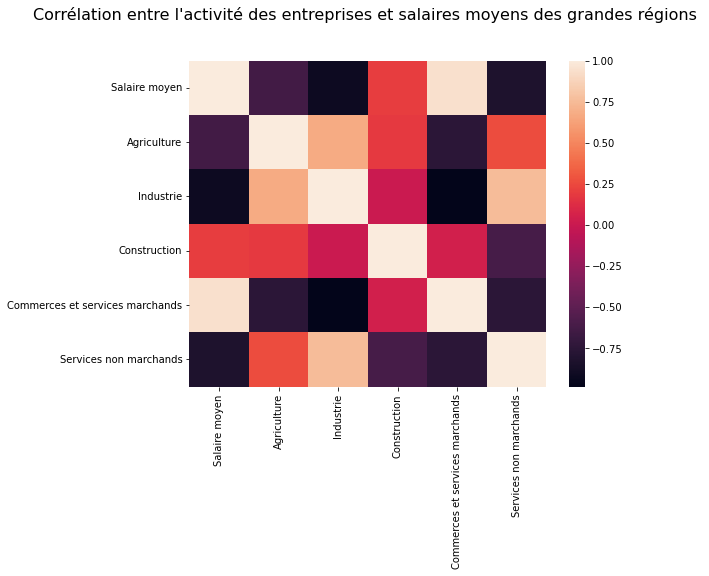

In [25]:
colors = ["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"]

gde_regions_synth_prop.columns = ['Grande region', 'Salaire moyen', 'Agriculture', 'Industrie', 'Construction', 'Commerces et services marchands', 'Services non marchands']

plt.figure(figsize=(8,6))
sns.heatmap(gde_regions_synth_prop.corr())

plt.title('Corrélation entre l\'activité des entreprises et salaires moyens des grandes régions \n\n', fontsize=16)

<AxesSubplot:>

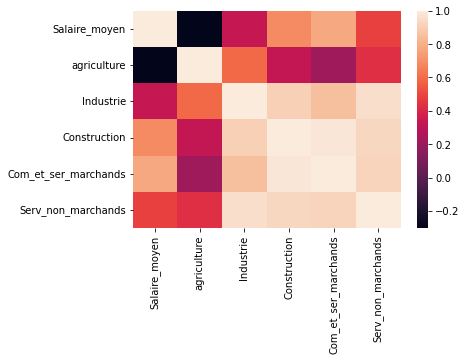

In [26]:
sns.heatmap(gde_regions_synth.corr())

In [27]:
gde_regions_synth_prop.corr()

,Salaire moyen,Agriculture,Industrie,Construction,Commerces et services marchands,Services non marchands
Salaire moyen,1.000000,-0.636147,-0.917535,0.199495,0.941931,-0.829617
Agriculture,-0.636147,1.000000,0.669235,0.182518,-0.756508,0.259861
Industrie,-0.917535,0.669235,1.000000,0.000406,-0.984844,0.752648
Construction,0.199495,0.182518,0.000406,1.000000,0.045959,-0.615929
Commerces et services marchands,0.941931,-0.756508,-0.984844,0.045959,1.000000,-0.754353
Services non marchands,-0.829617,0.259861,0.752648,-0.615929,-0.754353,1.000000


Il apparait que l'industrie a une corrélation négative sur le salaire moyen et qu'à l'inverse, le commerce et service marchands ainsi que les services non marchands ont une corrélation positive

## Analyse de la répartition de l'activité des entreprises par grande région ##

In [28]:
cols = ['Agriculture', 'Industrie', 'Construction', 'Commerces et services marchands', 'Services non marchands'] 
for col in cols:
    gde_regions_synth_prop[col] = gde_regions_synth_prop[col] * 100

In [29]:
gde_regions_synth_prop_plot = gde_regions_synth_prop.drop('Salaire moyen', axis=1)

In [30]:
gde_regions_synth_prop_plot.index = gde_regions_synth_prop_plot['Grande region']

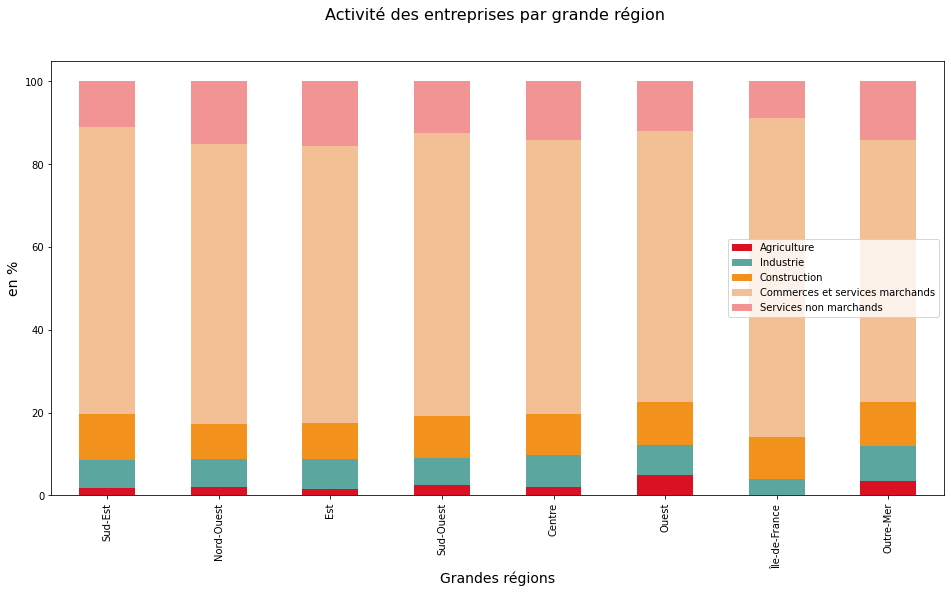

In [31]:
gde_regions_synth_prop_plot.plot(kind='bar', stacked=True, color=["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"], figsize=(16,8))
plt.title('Activité des entreprises par grande région \n\n', fontsize=16)
plt.ylabel('en %', fontsize=14)
plt.xlabel('Grandes régions', fontsize=14)
plt.show()

## L'industrie ##

In [32]:
grandes_regions = [i for i in gde_regions_synth['Grande region']]
ets_industrie = [i for i in gde_regions_synth_prop['Industrie']]
salaire_moyen = [i for i in gde_regions_synth['Salaire_moyen']]
industrie_df = pd.DataFrame({'Grande Région': grandes_regions, 'Ets industrie': ets_industrie, 'Salaire moyen': salaire_moyen})
industrie_df

,Grande Région,Ets industrie,Salaire moyen
0,Sud-Est,6.721652,15.80
1,Nord-Ouest,6.773622,14.69
2,Est,7.304150,14.44
3,Sud-Ouest,6.352829,15.04
4,Centre,7.523505,14.87
5,Ouest,7.349828,14.87
6,Île-de-France,3.881600,20.84
7,Outre-Mer,8.551442,14.29


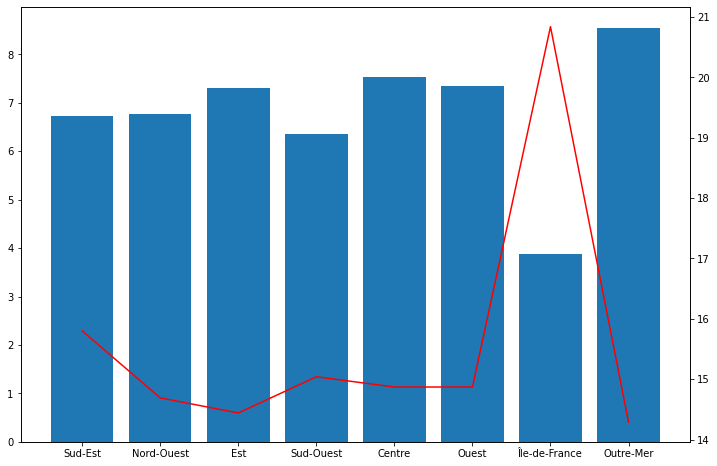

In [33]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax1.bar(industrie_df['Grande Région'], industrie_df['Ets industrie'])
ax2 = ax1.twinx()
ax2.plot(industrie_df['Grande Région'], industrie_df['Salaire moyen'], color='r')
plt.show()

In [34]:
gde_regions_synth_prop

,Grande region,Salaire moyen,Agriculture,Industrie,Construction,Commerces et services marchands,Services non marchands
0,Sud-Est,15.80,1.758975,6.721652,11.230285,69.139500,11.149588
1,Nord-Ouest,14.69,2.103343,6.773622,8.427118,67.549095,15.146822
2,Est,14.44,1.474120,7.304150,8.644206,66.943343,15.634180
3,Sud-Ouest,15.04,2.619226,6.352829,10.209405,68.322066,12.496474
4,Centre,14.87,2.141488,7.523505,10.044728,66.121406,14.168873
5,Ouest,14.87,4.927832,7.349828,10.181702,65.426515,12.114124
6,Île-de-France,20.84,0.178332,3.881600,10.136078,76.887179,8.916812
7,Outre-Mer,14.29,3.369801,8.551442,10.626290,63.197019,14.255447


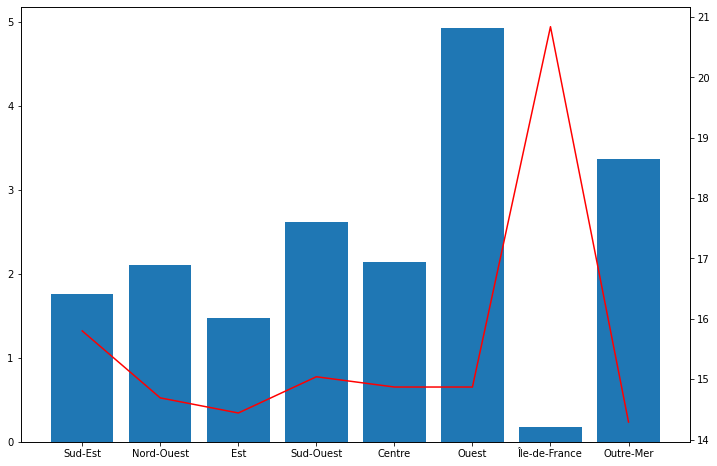

In [35]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax1.bar(gde_regions_synth_prop['Grande region'], gde_regions_synth_prop['Agriculture'])
ax2 = ax1.twinx()
ax2.plot(gde_regions_synth_prop['Grande region'], gde_regions_synth_prop['Salaire moyen'], color='r')
plt.show()

# Communes fortement industrialisées versus faiblement industrialisées #

In [36]:
codgeo_activite = df_analyse.groupby('CODGEO').agg(salaire_moyen = ('SNHM20', 'mean'), agriculture = ('ETAZ20', 'sum'), Industrie = ('ETBE20', 'sum'), Construction=('ETFZ20', 'sum'), Com_et_ser_marchands = ('ETGU20', 'sum'), Serv_non_marchands = ('ETOQ20', 'sum'), Total = ('ETTOT20', 'sum'))
for i in codgeo_activite.columns[1:]:
    codgeo_activite['%'+ i] = codgeo_activite[i] / codgeo_activite['Total']
    codgeo_activite['%'+ i] = codgeo_activite['%'+ i] * 100

codgeo_activite.salaire_moyen = np.round(codgeo_activite.salaire_moyen, 2)
codgeo_activite

,salaire_moyen,agriculture,Industrie,Construction,Com_et_ser_marchands,Serv_non_marchands,Total,%agriculture,%Industrie,%Construction,%Com_et_ser_marchands,%Serv_non_marchands,%Total
CODGEO,,,,,,,,,,,,,
1004,15.01,1,31,58,410,86,586,0.170648,5.290102,9.897611,69.965870,14.675768,100.0
1007,15.26,4,11,11,32,10,68,5.882353,16.176471,16.176471,47.058824,14.705882,100.0
1014,14.58,1,53,16,145,14,229,0.436681,23.144105,6.986900,63.318777,6.113537,100.0
1024,14.66,1,8,12,52,7,80,1.250000,10.000000,15.000000,65.000000,8.750000,100.0
1025,14.95,19,7,12,17,5,60,31.666667,11.666667,20.000000,28.333333,8.333333,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30344,15.54,5,11,27,92,22,157,3.184713,7.006369,17.197452,58.598726,14.012739,100.0
30350,11.71,3,10,9,118,41,181,1.657459,5.524862,4.972376,65.193370,22.651934,100.0
30351,20.38,2,15,31,260,48,356,0.561798,4.213483,8.707865,73.033708,13.483146,100.0


In [37]:
codgeo_activite_forte_indus = codgeo_activite[codgeo_activite['%Industrie'] > 15.0]
codgeo_activite_faible_indus = codgeo_activite[codgeo_activite['%Industrie'] < 5.0]

In [38]:
len(codgeo_activite_forte_indus)

462

In [39]:
len(codgeo_activite_faible_indus)

1118

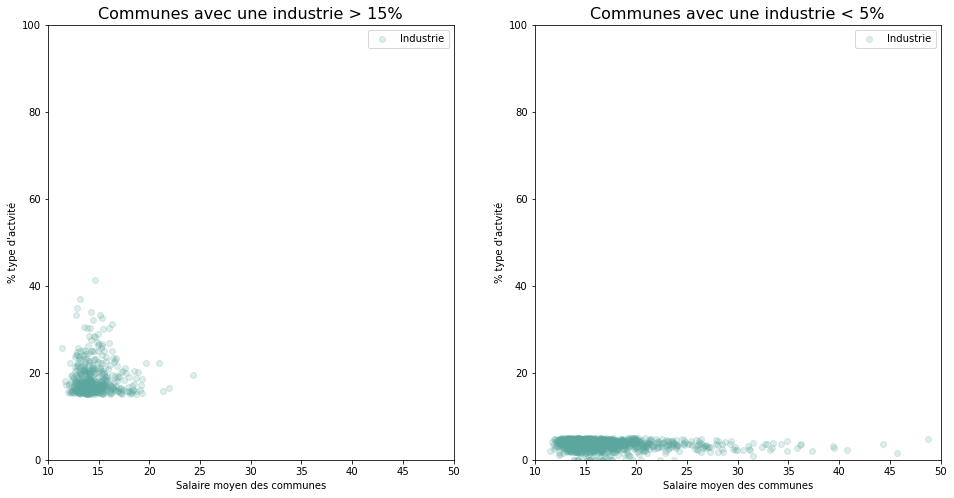

In [40]:
color=["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"]

fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(121)

plt.scatter(codgeo_activite_forte_indus['salaire_moyen'], codgeo_activite_forte_indus['%Industrie'], color="#5BA69E", alpha=0.2, label='Industrie')

plt.xlim(10,50)
plt.ylim(0,100)
plt.title('Communes avec une industrie > 15%', fontsize=16)
plt.xlabel('Salaire moyen des communes')
plt.ylabel('% type d\'actvité')
plt.legend()

plt.subplot(122)

plt.scatter(codgeo_activite_faible_indus['salaire_moyen'], codgeo_activite_faible_indus['%Industrie'], color="#5BA69E", alpha=0.2, label='Industrie')

plt.xlim(10,50)
plt.ylim(0,100)
plt.title('Communes avec une industrie < 5%', fontsize=16)
plt.xlabel('Salaire moyen des communes')
plt.ylabel('% type d\'actvité')
plt.legend()
plt.show()

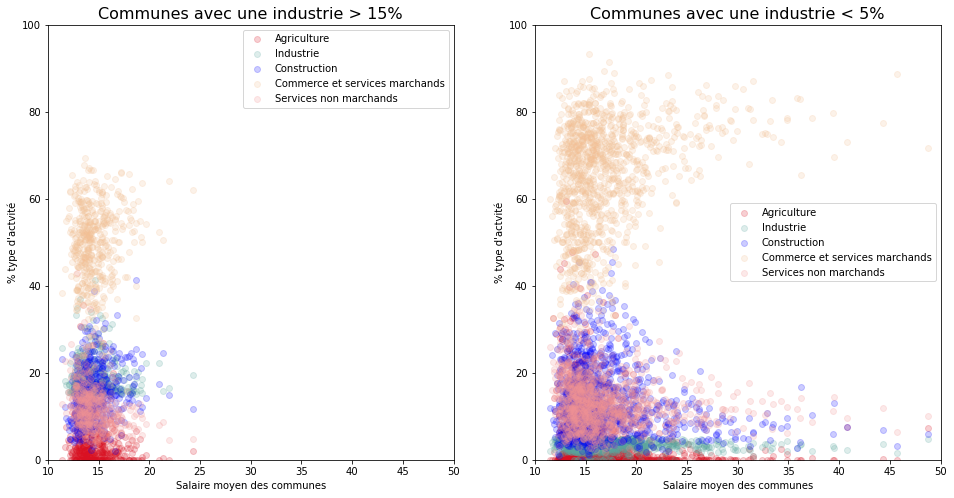

In [41]:
color=["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"]

fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(121)
plt.scatter(codgeo_activite_forte_indus['salaire_moyen'], codgeo_activite_forte_indus['%agriculture'], color="#D91122", alpha=0.2, label='Agriculture')
plt.scatter(codgeo_activite_forte_indus['salaire_moyen'], codgeo_activite_forte_indus['%Industrie'], color="#5BA69E", alpha=0.2, label='Industrie')
plt.scatter(codgeo_activite_forte_indus['salaire_moyen'], codgeo_activite_forte_indus['%Construction'], color="b", alpha=0.2, label='Construction')
plt.scatter(codgeo_activite_forte_indus['salaire_moyen'], codgeo_activite_forte_indus['%Com_et_ser_marchands'], color="#F2C094", alpha=0.2, label='Commerce et services marchands')
plt.scatter(codgeo_activite_forte_indus['salaire_moyen'], codgeo_activite_forte_indus['%Serv_non_marchands'], color="#F29494", alpha=0.2, label='Services non marchands')
plt.xlim(10,50)
plt.ylim(0,100)
plt.title('Communes avec une industrie > 15%', fontsize=16)
plt.xlabel('Salaire moyen des communes')
plt.ylabel('% type d\'actvité')
plt.legend()

plt.subplot(122)
plt.scatter(codgeo_activite_faible_indus['salaire_moyen'], codgeo_activite_faible_indus['%agriculture'], color="#D91122", alpha=0.2, label='Agriculture')
plt.scatter(codgeo_activite_faible_indus['salaire_moyen'], codgeo_activite_faible_indus['%Industrie'], color="#5BA69E", alpha=0.2, label='Industrie')
plt.scatter(codgeo_activite_faible_indus['salaire_moyen'], codgeo_activite_faible_indus['%Construction'], color="b", alpha=0.2, label='Construction')
plt.scatter(codgeo_activite_faible_indus['salaire_moyen'], codgeo_activite_faible_indus['%Com_et_ser_marchands'], color="#F2C094", alpha=0.2, label='Commerce et services marchands')
plt.scatter(codgeo_activite_faible_indus['salaire_moyen'], codgeo_activite_faible_indus['%Serv_non_marchands'], color="#F29494", alpha=0.2, label='Services non marchands')
plt.xlim(10,50)
plt.ylim(0,100)
plt.title('Communes avec une industrie < 5%', fontsize=16)
plt.xlabel('Salaire moyen des communes')
plt.ylabel('% type d\'actvité')
plt.legend()
plt.show()

# Tailles des entreprises #

- Variables entreprises:
    - ETTOT20 Total Ets actifs fin 2020	
    - ETAZ20 Ets actifs agriculture fin 2020	
    - ETBE20 Ets actifs industrie fin 2020	
    - ETFZ20 Ets actifs construction fin 2020	
    - ETGU20 Ets actifs commerce et services marchands fin 2020	
    - ETOQ20 Ets actifs services non marchands fin 2020	
    - ETTEF020 Ets actifs sans salarié fin 2020	
    - ETTEF120 Ets actifs de 1 à 9 salariés fin 2020	
    - ETTEF1020 Ets actifs de 10 à 19 salariés fin 2020	
    - ETTEF2020 Ets actifs de 20 à 49 salariés fin 2020	
    - ETTEF5020 Ets actifs de 50 salariés ou plus fin 2020	
    - ETPTOT20 Postes des Ets actifs fin 2020	
    - ETPTEF120 Postes des Ets actifs de 1 à 9 salariés fin 2020	
    - ETPTEF1020 Postes des Ets actifs de 10 à 19 salariés fin 2020	
    - ETPTEF2020 Postes des Ets actifs de 20 à 49 salariés fin 2020	
    - ETPTEF5020 Postes des Ets actifs de 50 à 99 salariés fin 2020	
    - ETPTEFCP20 Postes des Ets actifs de 100 salariés ou plus fin 2020	

- Variables géographiques:
    - CODGEO
    - EU_circo
    - nom_commune
    - nom_dep
    - nom_region
- Variables entreprises:
    - ETTOT20 Total Ets actifs fin 2020	
    - ETTEF020 Ets actifs sans salarié fin 2020	
    - ETTEF120 Ets actifs de 1 à 9 salariés fin 2020	
    - ETTEF1020 Ets actifs de 10 à 19 salariés fin 2020	
    - ETTEF2020 Ets actifs de 20 à 49 salariés fin 2020	
    - ETTEF5020 Ets actifs de 50 salariés ou plus fin 2020	
- Variables salaires
    - SNHM20 Salaire net horaire moyen en 2020

In [42]:
df_taille = df_analyse[['CODGEO', 'EU_circo', 'nom_commune', 'nom_dep', 'nom_region', 'SNHM20','ETTEF020', 'ETTEF120', 'ETTEF1020', 'ETTEF2020', 'ETTEF5020', 'ETTOT20']].reset_index(drop=True)

In [43]:
df_taille.ETTOT20.describe()

count      5376.000000
mean        344.340216
std        2563.276706
min          14.000000
25%          72.000000
50%         126.000000
75%         255.250000
max      176458.000000
Name: ETTOT20, dtype: float64

In [44]:
#Division du dataset en déciles et centiles

df_taille['decile_ets'] = pd.qcut(df_taille['ETTOT20'], q=10, labels=[i for i in range(0,10)])
df_taille['decile_ets_ranges'] = pd.qcut(df_taille['ETTOT20'], q=10)
df_taille['centile_ets'] = pd.qcut(df_taille['ETTOT20'], q=100, labels=[i for i in range(0,100)])
df_taille['quartile_ets_50'] = pd.qcut(df_taille['ETTEF5020'], q=4, labels=[i for i in range(0,4)])


In [45]:
df_taille['decile_ets_ranges'].value_counts().sort_index().to_frame()

,decile_ets_ranges
"(13.999, 48.0]",540
"(48.0, 63.0]",537
"(63.0, 80.0]",538
"(80.0, 101.0]",560
"(101.0, 126.0]",521
"(126.0, 161.0]",535
"(161.0, 216.0]",539
"(216.0, 322.0]",533
"(322.0, 599.0]",535
"(599.0, 176458.0]",538


In [46]:
groupby_decile = df_taille.groupby('decile_ets', as_index=False).agg(sans_salarié = ('ETTEF020', 'sum'), 
                                                       de_1_a_9 = ('ETTEF120', 'sum'),
                                                       de_10_a_19 = ('ETTEF1020', 'sum'),
                                                       de_20_a_49 = ('ETTEF2020', 'sum'),
                                                       de_50_a_plus = ('ETTEF5020', 'sum'),
                                                       total_ets = ('ETTOT20', 'sum'),
                                                      )

groupby_decile['total_ets%'] = np.round(groupby_decile.total_ets / groupby_decile.total_ets.sum() * 100, 2)
groupby_decile

,decile_ets,sans_salarié,de_1_a_9,de_10_a_19,de_20_a_49,de_50_a_plus,total_ets,total_ets%
0,0,1846.0,15239.0,1384.0,1171.0,466.0,20106,1.09
1,1,2838.0,22567.0,2301.0,1634.0,869.0,30209,1.63
2,2,3414.0,28508.0,3186.0,2197.0,1288.0,38593,2.08
3,3,4485.0,37167.0,4409.0,2926.0,1940.0,50927,2.75
4,4,5160.0,42854.0,5323.0,3525.0,2331.0,59193,3.20
5,5,6685.0,55596.0,6909.0,4442.0,2902.0,76534,4.13
6,6,9114.0,72554.0,9302.0,5875.0,4182.0,101027,5.46
7,7,12199.0,98685.0,13732.0,8643.0,5843.0,139102,7.51
8,8,21041.0,167127.0,23170.0,14756.0,9762.0,235856,12.74
9,9,101726.0,787005.0,102174.0,64073.0,44648.0,1099626,59.40


In [47]:
groupby_centile = df_taille.groupby('centile_ets', as_index=False).agg(
                                                       salaire_moyen = ('SNHM20', 'mean'),
                                                       sans_salarié = ('ETTEF020', 'sum'), 
                                                       de_1_a_9 = ('ETTEF120', 'sum'),
                                                       de_10_a_19 = ('ETTEF1020', 'sum'),
                                                       de_20_a_49 = ('ETTEF2020', 'sum'),
                                                       de_50_a_plus = ('ETTEF5020', 'sum'),
                                                       total_ets = ('ETTOT20', 'sum'),
                                                      )

groupby_centile['total_ets%'] = np.round(groupby_centile.total_ets / groupby_centile.total_ets.sum() * 100, 2)
groupby_centile

,centile_ets,salaire_moyen,sans_salarié,de_1_a_9,de_10_a_19,de_20_a_49,de_50_a_plus,total_ets,total_ets%
0,0,15.202681,118.0,1041.0,101.0,87.0,20.0,1367,0.07
1,1,15.308120,168.0,1429.0,125.0,114.0,32.0,1868,0.10
2,2,15.511713,117.0,1007.0,95.0,80.0,34.0,1333,0.07
3,3,14.958953,193.0,1691.0,149.0,115.0,59.0,2207,0.12
4,4,15.426886,175.0,1385.0,132.0,103.0,38.0,1833,0.10
...,...,...,...,...,...,...,...,...,...
95,95,15.875227,5508.0,44063.0,5704.0,3435.0,2366.0,61076,3.30
96,96,15.416706,6198.0,52346.0,6903.0,4280.0,3066.0,72793,3.93
97,97,15.298997,8774.0,69093.0,9424.0,5906.0,4162.0,97359,5.26
98,98,16.203240,11827.0,92466.0,13457.0,8560.0,6257.0,132567,7.16


Text(0.5, 1.0, "Répartition du nombre d'entreprises de 50 et + salariés par décile \n(Déciles du nombre total d'enreprises par commune)")

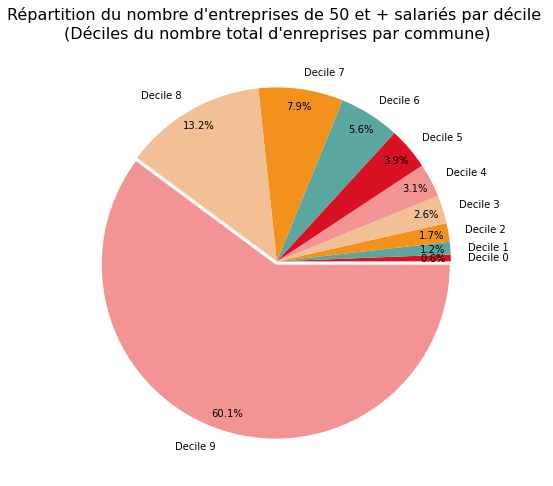

In [48]:
    #Création figure nombre d'entreprises par décile
    fig, ax = plt.subplots(1,1, figsize=(16,8))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.subplot(111)
    x = groupby_decile
    labels = ['Decile ' +str(i) for i in x['decile_ets']]
    ax1 = plt.pie(x=x['de_50_a_plus'], 
                  labels=labels, 
                  autopct='%.1f%%', 
                  colors=["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"],
                  explode=[0,0,0,0,0,0,0,0,0,0.02],
                  pctdistance = 0.9)
    plt.title('Répartition du nombre d\'entreprises de 50 et + salariés par décile \n(Déciles du nombre total d\'enreprises par commune)', fontsize=16)


In [49]:
df_taille.head()

,CODGEO,EU_circo,nom_commune,nom_dep,nom_region,SNHM20,ETTEF020,ETTEF120,ETTEF1020,ETTEF2020,ETTEF5020,ETTOT20,decile_ets,decile_ets_ranges,centile_ets,quartile_ets_50
0,1004,Sud-Est,Ambérieu-en-Bugey,Ain,Auvergne-Rhône-Alpes,15.013132,36.0,419.0,69.0,41.0,21.0,586,8,"(322.0, 599.0]",89,3
1,1007,Sud-Est,Ambronay,Ain,Auvergne-Rhône-Alpes,15.261333,4.0,54.0,6.0,4.0,0.0,68,2,"(63.0, 80.0]",22,0
2,1014,Sud-Est,Arbent,Ain,Auvergne-Rhône-Alpes,14.578709,15.0,153.0,33.0,14.0,14.0,229,7,"(216.0, 322.0]",71,3
3,1024,Sud-Est,Attignat,Ain,Auvergne-Rhône-Alpes,14.658174,7.0,62.0,3.0,3.0,5.0,80,2,"(63.0, 80.0]",29,1
4,1025,Sud-Est,Bâgé-Dommartin,Ain,Auvergne-Rhône-Alpes,14.952910,5.0,48.0,3.0,3.0,1.0,60,1,"(48.0, 63.0]",17,0


Text(0.5, 1.0, "Répartition du nombre d'entreprises de 50 et + salariés par centile \n(Centiles du nombre total d'enreprises par commune)")

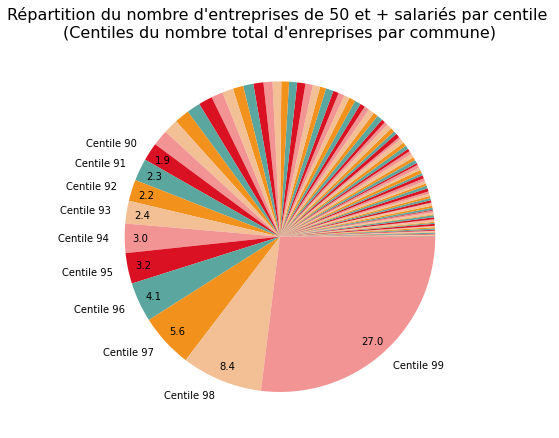

In [63]:
    #Création figure nombre d'entreprises par centile
    fig, ax = plt.subplots(1,1, figsize=(16,8))

    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.subplot(121)
    x = groupby_centile
    labels = ['Centile ' +str(i) if i >= 90 else '' for i in x['centile_ets'] ]
    ax1 = plt.pie(x=x['de_50_a_plus'], 
                  labels=labels, 
                  autopct= lambda p: format(p, '.1f') if p > 1.88 else None, 
                  colors=["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"],
                  pctdistance = 0.9)
    plt.title('Répartition du nombre d\'entreprises de 50 et + salariés par centile \n(Centiles du nombre total d\'enreprises par commune)', fontsize=16)




<Figure size 576x576 with 0 Axes>

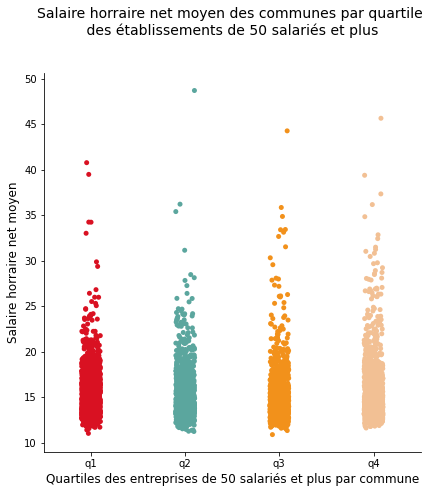

In [87]:
palette = ["#D91122", "#5BA69E", "#F2911B", "#F2C094"]
plt.figure(figsize=(8,8))
sns.catplot(data = df_taille, x='quartile_ets_50', y='SNHM20', palette=sns.color_palette(palette, 4), height=6, aspect=1)
#ax2 = plt.bar(df_taille.quartile_ets_50, df_taille.SNHM20, color='#5BA69E', alpha=0.2)
plt.xlabel('Quartiles des entreprises de 50 salariés et plus par commune', fontsize=12)
plt.ylabel('Salaire horraire net moyen', fontsize=12)
plt.title('Salaire horraire net moyen des communes par quartile \n des établissements de 50 salariés et plus \n\n', fontsize=14)
plt.xticks([0,1,2,3], ['q1','q2','q3','q4'])

plt.show()

In [88]:
df_taille.corr()

,SNHM20,ETTEF020,ETTEF120,ETTEF1020,ETTEF2020,ETTEF5020,ETTOT20
SNHM20,1.000000,0.066264,0.068423,0.068023,0.067909,0.077972,0.068541
ETTEF020,0.066264,1.000000,0.998021,0.991448,0.988928,0.972095,0.997965
ETTEF120,0.068423,0.998021,1.000000,0.994765,0.992780,0.976312,0.999814
ETTEF1020,0.068023,0.991448,0.994765,1.000000,0.998520,0.989980,0.996378
ETTEF2020,0.067909,0.988928,0.992780,0.998520,1.000000,0.991842,0.994664
ETTEF5020,0.077972,0.972095,0.976312,0.989980,0.991842,1.000000,0.979918
ETTOT20,0.068541,0.997965,0.999814,0.996378,0.994664,0.979918,1.000000
